In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/ethereum_price.csv')

In [3]:
df.head()

Date     Price      Open      High       Low     Vol. Change %
0  Mar 08, 2023  1,553.49  1,561.79  1,569.70  1,548.98  498.57K   -0.53%
1  Mar 07, 2023  1,561.78  1,565.84  1,580.95  1,536.31  460.10K   -0.26%
2  Mar 06, 2023  1,565.84  1,564.36  1,581.13  1,555.43  322.16K    0.09%
3  Mar 05, 2023  1,564.37  1,566.73  1,587.95  1,556.84  313.01K   -0.15%
4  Mar 04, 2023  1,566.73  1,569.45  1,577.02  1,550.10  247.02K   -0.14%

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2555 non-null   object
 1   Price     2555 non-null   object
 2   Open      2555 non-null   object
 3   High      2555 non-null   object
 4   Low       2555 non-null   object
 5   Vol.      2555 non-null   object
 6   Change %  2555 non-null   object
dtypes: object(7)
memory usage: 139.9+ KB


In [5]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [6]:
# change object dtype to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

In [7]:
# change Vol. column to numbers: (x1e3 for K, x1e6 for M, x1e9 for B, 0 for -)
df['Vol.'] = df['Vol.'].replace({'K': '*1e3', 'M': '*1e6', 'B': '*1e9', '-': 0}, regex = True).map(pd.eval).astype(int)

In [8]:
# converting to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# data type check after transformations
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                 int32
Change %           float64
dtype: object

In [10]:
df.head()

Date    Price     Open     High      Low    Vol.  Change %
0 2023-03-08  1553.49  1561.79  1569.70  1548.98  498570     -0.53
1 2023-03-07  1561.78  1565.84  1580.95  1536.31  460100     -0.26
2 2023-03-06  1565.84  1564.36  1581.13  1555.43  322160      0.09
3 2023-03-05  1564.37  1566.73  1587.95  1556.84  313010     -0.15
4 2023-03-04  1566.73  1569.45  1577.02  1550.10  247020     -0.14

In [11]:
# function for basic statistics
def basic_stat(x):
    return print(x.describe())

In [12]:
# Price
basic_stat(df['Price'])

count    2555.000000
mean      892.548841
std      1116.662557
min         6.700000
25%       150.580000
50%       310.380000
75%      1362.700000
max      4808.380000
Name: Price, dtype: float64


In [13]:
# Open
basic_stat(df['Open'])

count    2555.000000
mean      891.966955
std      1116.738625
min         6.680000
25%       150.130000
50%       309.820000
75%      1358.755000
max      4808.340000
Name: Open, dtype: float64


In [14]:
# High
basic_stat(df['High'])

count    2555.000000
mean      922.027190
std      1151.409264
min         7.320000
25%       156.815000
50%       318.900000
75%      1398.580000
max      4864.060000
Name: High, dtype: float64


In [15]:
# Low
basic_stat(df['Low'])

count    2555.000000
mean      857.857425
std      1076.342150
min         5.860000
25%       144.965000
50%       295.440000
75%      1311.590000
max      4715.430000
Name: Low, dtype: float64


In [16]:
# null values
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [17]:
# function for histogram
def hist_col(x):
    return x.hist(bins = 100, legend = True)

<AxesSubplot:>

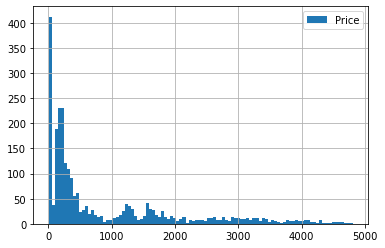

In [18]:
# histogram of Price
hist_col(df['Price'])

<AxesSubplot:>

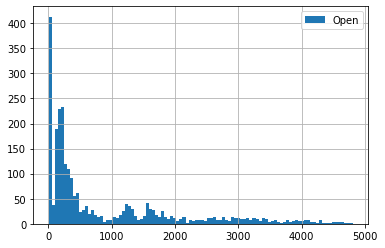

In [19]:
# histogram of Open
hist_col(df['Open'])

<AxesSubplot:>

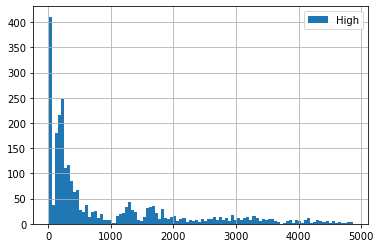

In [20]:
# histogram of High
hist_col(df['High'])

<AxesSubplot:>

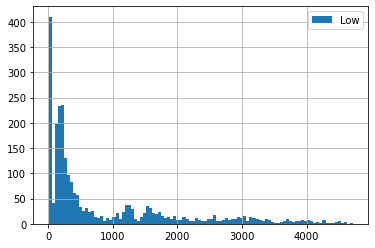

In [21]:
# histogram of Low
hist_col(df['Low'])

In [22]:
# function for boxplot
def box_col(x):
    return sns.boxplot(x)

c:\Users\james\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open'>

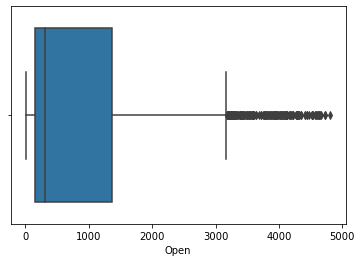

In [23]:
# boxplot of Open
box_col(df['Open'])

c:\Users\james\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High'>

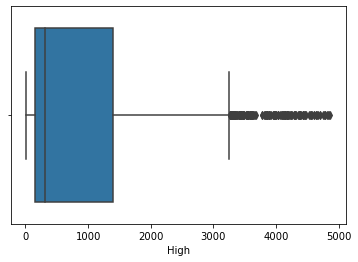

In [24]:
# boxplot of High
box_col(df['High'])

c:\Users\james\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low'>

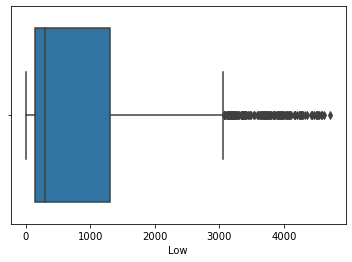

In [25]:
# boxplot of Low
box_col(df['Low'])

<AxesSubplot:xlabel='Date'>

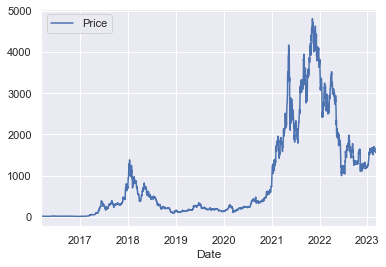

In [27]:
# visualizing price
sns.set()
df.plot(x = 'Date', y = 'Price')

In [33]:
df.to_csv('ethereum_price_model.csv')